# PCA

Importing MNIST dataet and necessary libaries

In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load MNIST Dataset 

In [2]:
mnist_data = load_digits().data

In [3]:
mnist_data.shape

(1797, 64)

In [4]:
print(mnist_data[0])
print(mnist_data[0].shape)

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
(64,)


In [5]:
resized_sample =np.resize(mnist_data[0], (8,8))

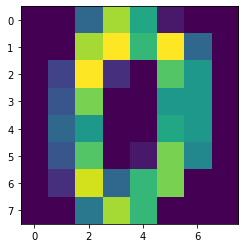

In [6]:
plt.imshow(resized_sample)
plt.show()

### * What is PCA?
* Principal Component Analysis, It is use for dimensionality reduction. 
* We can convert our high dimension data into lower dimension.
* We'll see an example reducing dimention of MNIST dataset which has 64 dimention.

In [7]:
# Import PCA from sklearn
from sklearn.decomposition import PCA

In [8]:
dimension_reduction = PCA(n_components=49)
reduced_mnist=dimension_reduction.fit_transform(mnist_data)

In [9]:
dimension_reduction.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': 49,
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [10]:
reduced_mnist.shape

(1797, 49)

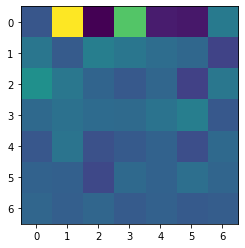

In [11]:
plt.imshow(np.resize(reduced_mnist[0], (7,7)))

# Visualization of high dimension dataset 

In [12]:
import tensorflow as tf

In [13]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [14]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

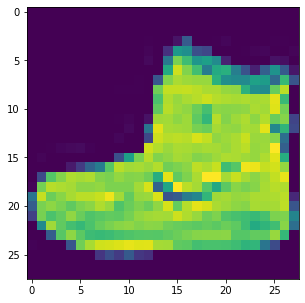

In [15]:
plt.figure(figsize=(5,5))
plt.imshow(train_images[0])
plt.show()

In [16]:
train_images.shape

(60000, 28, 28)

## Change the shape of train images
### Flatter the image

In [17]:
resized_train_images=np.resize(train_images, (60000, 28*28))

In [9]:
resized_train_images.shape
# Now we have data with 784 features

(60000, 784)

In [18]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(resized_train_images)
print(standardized_data.shape)

(60000, 784)


## Co-Variance Matrics
= Dot_Product(A.T, A)

In [19]:
covariance_matrix = np.matmul(standardized_data.T , standardized_data )
print(covariance_matrix.shape)

(784, 784)


## Eigen Values and Eigen Vector

In [20]:
from scipy.linalg import eigh
values ,  vectors = eigh(covariance_matrix, eigvals=(782, 783))
print(values.shape)
print(vectors.shape)

(2,)
(784, 2)


In [21]:
# change the shape of veator
vectors= vectors.T
print(vectors.shape)

(2, 784)


In [22]:
# we have vectors and original points
# Project original points over fearured vectors
new_coordinates = np.matmul(vectors , standardized_data.T)
print(new_coordinates.shape)

(2, 60000)


In [23]:
new_coordinates = np.vstack((new_coordinates ,train_labels)).T
new_coordinates.shape


(60000, 3)

In [24]:
df = pd.DataFrame(new_coordinates , columns= ('Feature_1','Feature_2' , 'labels'))

In [25]:
df.head()

,Feature_1,Feature_2,labels
0,20.866749,0.801175,9.0
1,-4.968512,-17.074206,0.0
2,-12.296101,9.601641,0.0
3,-11.576765,0.311206,3.0
4,-12.867738,-8.963833,0.0


/home/prateeksahu147/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


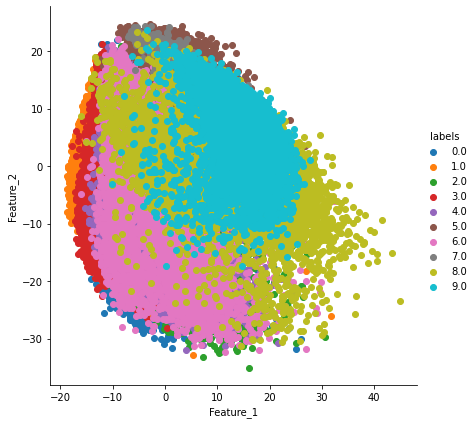

In [26]:
import seaborn as sns
sns.FacetGrid(df , hue="labels" ,size=6 ).map(plt.scatter , 'Feature_1', 'Feature_2').add_legend()
plt.show()

In [27]:
from sklearn.manifold import TSNE

In [28]:
data_tsne = standardized_data[0:15000 , :]
tsne = TSNE().fit_transform(data_tsne)

In [30]:
import seaborn as sns
sns.FacetGrid(df , hue="labels" ,size=6 ).map(plt.scatter , 'Feature_1', 'Feature_2').add_legend()
plt.show()

array([[ 33.643864  ,  43.89492   ],
       [  6.240841  , -64.057556  ],
       [-15.832922  , -31.380056  ],
       ...,
       [ -5.450619  , -62.827057  ],
       [ 11.057906  ,  12.616639  ],
       [-13.771859  ,   0.18264267]], dtype=float32)

In [32]:
tsne.shape

(15000, 2)

In [36]:
tsne[:,1:].shape

(15000, 1)